In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

In [6]:
# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)

R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

In [9]:
R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

In [10]:
X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

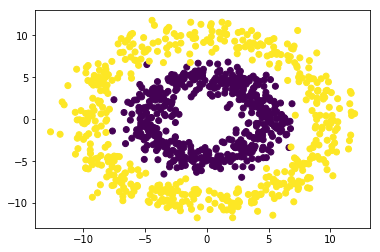

In [14]:
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [19]:
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))

In [21]:
# add a column of r = sqrt(x^2 + y^2)
r = np.sqrt( (X * X).sum(axis=1) ).reshape(-1, 1)
Xb = np.concatenate((ones, r, X), axis=1)

In [39]:
# randomly initialize the weights
w = np.random.randn(D + 2)

In [41]:
# calculate the model output
z = Xb.dot(w)

In [43]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [44]:
Y = sigmoid(z)

In [46]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [47]:
learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 500 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    # w += learning_rate * ( np.dot((T - Y).T, Xb) - 0.01*w ) # old
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

8074.673590768272
195.3620858402743
135.87641493813132
108.15462063286664
91.95786755100485
81.256726498949
73.61947319743925
67.87295049803953
63.37953068011391
59.76178367350727


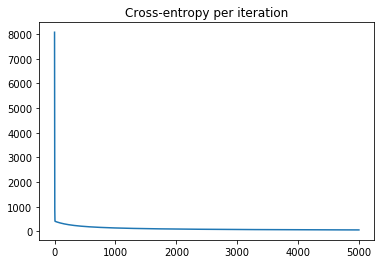

('Final w:', array([-11.70675671,   1.59839569,  -0.01470473,  -0.01512688]))
('Final classification rate:', 0.992)


In [48]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)